In [310]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import random
from pandas import DataFrame
from statsmodels.api import OLS

In [29]:
df2 = pd.read_csv("/Users/anusha/Desktop/Fall 2018/Data Science/HW3/hw3q2.csv") 

In [30]:
df2.head()

,a,b,c,d
0,3.428174,1.544246,3.335449,3.900882
1,2.390507,2.281372,4.927616,2.910647
2,5.194142,0.513593,2.508072,2.364633
3,4.307015,0.798009,4.568552,2.566827
4,5.259163,0.189096,2.758842,4.003236


# 2A

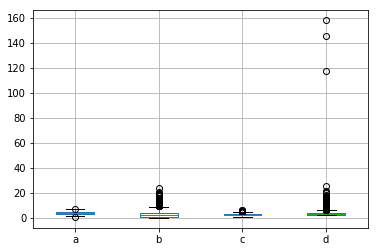

In [36]:
import matplotlib.pyplot as plt
boxplot = df2.boxplot(column=['a', 'b', 'c', 'd'])

# 2B

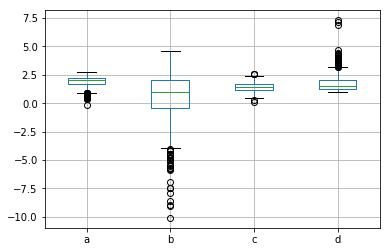

In [38]:
df3 = df2.applymap(np.log2)
boxplot = df3.boxplot(column=['a', 'b', 'c', 'd'])
# use below without applymap
#df2 = np.log2(df2)
#df2.boxplot()

# 2C for normalized data

In [41]:
print (df2.describe())

                 a            b            c            d
count  1000.000000  1000.000000  1000.000000  1000.000000
mean      1.945850     0.654741     1.432591     1.731929
std       0.402370     1.977045     0.363368     0.723584
min      -0.190934   -10.102888     0.079441     1.000447
25%       1.710059    -0.388364     1.185562     1.215099
50%       2.015092     0.988320     1.432716     1.545706
75%       2.234307     2.015376     1.679123     2.004704
max       2.780341     4.595383     2.592720     7.303235


# 2C for raw data

In [42]:
df4 = pd.read_csv("/Users/anusha/Desktop/Fall 2018/Data Science/HW3/hw3q2.csv")

In [43]:
print (df4.describe())

                 a            b            c            d
count  1000.000000  1000.000000  1000.000000  1000.000000
mean      3.993356     2.960433     2.786134     4.158032
std       1.009219     3.131134     0.711737     7.951631
min       0.876039     0.000909     1.056609     2.000620
25%       3.271742     0.763997     2.274519     2.321567
50%       4.042064     1.983874     2.699545     2.919469
75%       4.705365     4.042860     3.202333     4.013069
max       6.870148    24.173974     6.032348   157.940206


In [46]:
Adata = list(df4['a'])
Bdata = list(df4['b'])
Cdata = list(df4['c'])
Ddata = list(df4['d'])

In [ ]:
import seaborn as sns
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.distplot(Adata, kde=False, color="b", ax=axes[0, 0])
sns.distplot(Bdata, kde=False, color="b", ax=axes[0, 1])
sns.distplot(Cdata, kde=False, color="b", ax=axes[1, 0])
sns.distplot(Ddata, kde=False, color="b", ax=axes[1, 1])

# 2D for normalized data

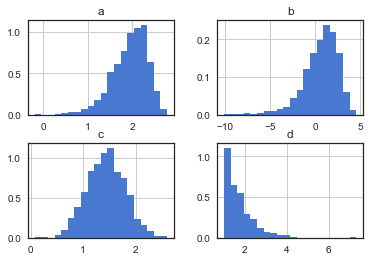

In [66]:
hist = df3.hist(density = True, bins = 20)

# 2D for raw data with bins=20

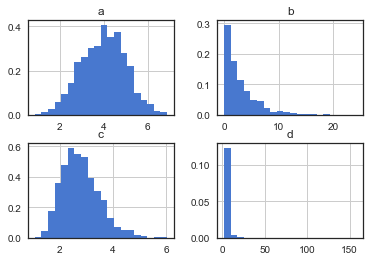

In [67]:
hist = df4.hist(density = True, bins = 20)

# 2D for raw data without specifying # bins

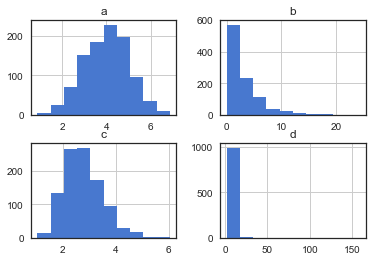

In [75]:
hist = df4.hist()

# 2E

Column A : Log Normal
Column B : Exponential
Column C : Normal
Column D : Pareto


# 2F

# Normal Probability plot for Column A

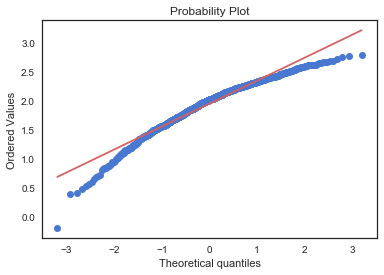

In [73]:
import scipy.stats
scipy.stats.probplot(Adata, dist="norm", plot=plt)
plt.show()

# Normal Probability plot for Column C

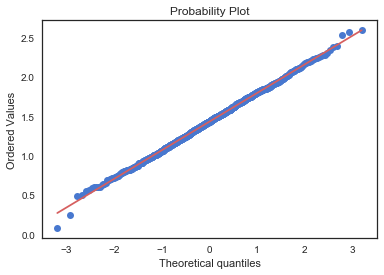

In [74]:
scipy.stats.probplot(Cdata, dist="norm", plot=plt)
plt.show()

# Normal Probability plot for Column B

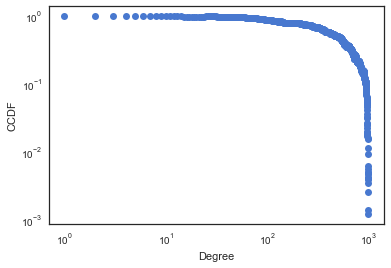

In [88]:
s = float(sum(Bdata))
cdf = np.cumsum(Bdata)/s
ccdf = 1-cdf
plt.plot(range(len(ccdf)),ccdf,'bo')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('CCDF')
plt.xlabel('Degree')
plt.show()

# Normal Probability plot for Column D

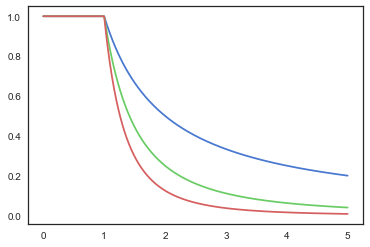

In [99]:
from scipy.stats import pareto

xm = 1 # scale 
alphas = [1, 2, 3] # shape parameters
Ddata = np.linspace(0, 5, 1000)

cdf = np.array([pareto.cdf(Ddata, scale = xm, b = a) for a in alphas])
ccdf = 1 - cdf
plt.plot(Ddata, ccdf.T)
plt.show()


# Question 3

In [100]:
hdfstore = pd.HDFStore('/Users/anusha/Desktop/Fall 2018/Data Science/HW3/hw3q3.h5')

In [103]:
hdfstore.keys()

['/coef', '/sf', '/x', '/y']

# 3A
r2 = 0.77
MSE = 0.21

In [309]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
a = LinearRegression()
a.fit(hdfstore['x'], hdfstore['y'])
pred = a.predict(hdfstore['x'])
print("Coefficients are: \n",a.coef_)
print('r2 = %.2f' % r2(y, pred))
print('mse = %.2f' % mse(y, pred))

Coefficients are: 
 [ 0.06936788  0.0743949   0.05047453  0.04548115  0.17625609  0.05651655
 -0.04814694 -0.07715186 -0.03304345  0.00060053 -0.02802782  0.00507863
  0.04788909 -0.02755054 -0.07752738  0.05638224]
r2 = 0.77
mse = 0.21


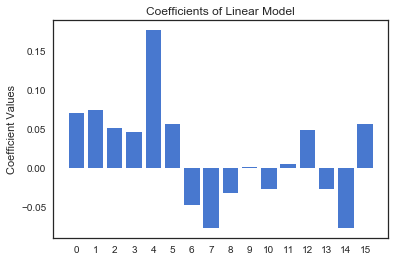

In [311]:
X = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
beta = a.coef_
x_axis = range(len(X))
plt.bar(x_axis, beta)
plt.xticks(x_axis,X)
plt.ylabel('Coefficient Values')
plt.title('Coefficients of Linear Model')
plt.show()

# 3B

In [289]:
from sklearn.linear_model import LinearRegression
a = LinearRegression()
x = hdfstore['x']
y = hdfstore['y']
n = 100
Data_Size = len(y)
coef_bs = np.zeros((n, x.shape[1]))
for i in range(n) :
    s = np.random.choice(np.arange(Data_Size), size = Data_Size, replace = True)
    y_new = y[s]
    x_new = x.iloc[s,:]
    a.fit(x_new,y_new)
    coef_bs[i,:] = a.coef_
print("Coefficients of Bootstrap are:\n", coef_bs)

Coefficients of Bootstrap are:
 [[ 0.06681415  0.07762086  0.0536622  ... -0.04788534 -0.00085041
   0.09133666]
 [ 0.07383886  0.0735437   0.05138818 ... -0.0689701  -0.12329998
   0.03941956]
 [ 0.07066874  0.07375086  0.05531066 ... -0.02481451 -0.11826672
   0.06368477]
 ...
 [ 0.07014479  0.07638374  0.05276894 ... -0.04184613 -0.1530186
   0.02863065]
 [ 0.067178    0.07700328  0.05376402 ...  0.01379369 -0.12261175
   0.04074772]
 [ 0.07764791  0.07152932  0.04556638 ...  0.04673034 -0.13655393
   0.0870575 ]]


In [290]:
std_coef = coef_bs.std(axis=0)
print("standard error of coefficients:\n", std_coef)

standard error of coefficients:
 [0.00248635 0.0018625  0.00409422 0.00540472 0.00986362 0.01280232
 0.05342809 0.04483466 0.05019795 0.04377086 0.05450923 0.05241867
 0.0532487  0.04852518 0.04749774 0.05242964]


In [294]:
t = result.params/std_coef
p_value = 2*stats.t.cdf(-np.abs(t), Data_Size - x.shape[1]-1)
print("p values are: \n", p_value)

p values are: 
 [0.00000000e+000 0.00000000e+000 3.94407587e-248 0.00000000e+000
 0.00000000e+000 0.00000000e+000 5.24170469e-030 2.02489230e-058
 9.22215791e-057 2.90649786e-078 1.29354441e-030 3.62069828e-031
 8.54096155e-043 6.60407808e-041 9.60668103e-042 7.40101767e-030]


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


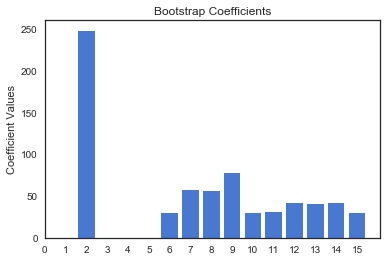

In [298]:
X = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
x_axis = range(len(X))
plt.bar(X,-np.log10(p_value))
plt.xticks(x_axis,X)
plt.ylabel('Coefficient Values')
plt.title('Bootstrap Coefficients')
plt.show()

# 3C

In [317]:
from sklearn.linear_model import Lasso
coeff_sum = []
r_square = []
alpha = []
mse_list = []
for i in range(-5,6) :
    lasso = Lasso(alpha=2**i)
    res = lasso.fit(hdfstore['x'], hdfstore['y'])
    beta_lasso = lasso.coef_
    coeff_sum.append(sum(beta_lasso))
    y_predict= lasso.predict(hdfstore['x'])
    mse_list.append(mse(hdfstore['y'], y_predict))
    r_square.append(r2(hdfstore['y'], y_predict))
    alpha.append(2**i)

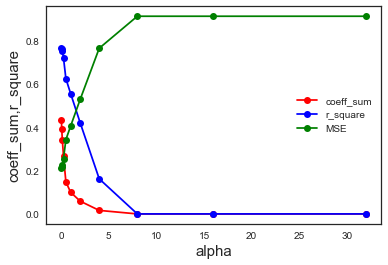

In [322]:
plt.plot(alpha, coeff_sum, linestyle='solid', color='red', marker='o', label="coeff_sum")
plt.plot(alpha, r_square, linestyle='solid', color='blue', marker='o', label="r_square")
plt.plot(alpha, mse_list, linestyle='solid', color='green', marker='o', label="MSE")
plt.xlabel("alpha", fontsize=15)
plt.ylabel("coeff_sum,r_square", fontsize=15)
plt.legend()
plt.show()

# 3D
r2 = 0.01
mse = 0.90

In [205]:
hdfstore = pd.HDFStore('/Users/anusha/Desktop/Fall 2018/Data Science/HW3/hw3q3.h5')
hdfstore.keys()

['/coef', '/sf', '/x', '/y']

In [254]:
x_new = pd.DataFrame()
for i in range(0,16) :
    x_new[i] = hdfstore['x'][i]/hdfstore['sf'][i]

In [312]:
a = LinearRegression()
a.fit(x_new, hdfstore['y'])
pred = a.predict(x_new)
print("Coefficients are: \n",a.coef_)
print('r2 = %.2f' % r2(y, pred))
print('mse = %.2f' % mse(y, pred))

Coefficients are: 
 [-0.00276232  0.00045285  0.00306329 -0.00571832  0.02724439  0.00049446
  0.12629111  0.0722121   0.01170601 -0.07970494  0.00483582 -0.0344231
 -0.10611609  0.13833974 -0.0761663  -0.04577827]
r2 = 0.01
mse = 0.90


In [259]:
y_predict= result.predict(x_new)
mse = sqrt(mean_squared_error(hdfstore['y'], y_predict))
mse

0.8893144220640651

In [251]:
expected_coeff = []
expected_coeff = hdfstore['coef'].tolist()
expected_coeff

[0.4,
 0.6,
 0.2,
 0.4,
 1.0,
 0.2,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

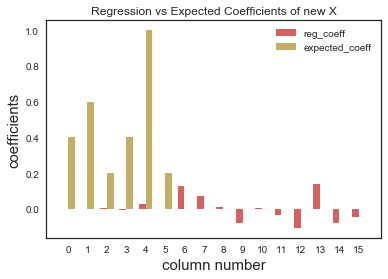

In [314]:
N = 16
ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, a.coef_, width, color='r')

rects2 = ax.bar(ind + width, expected_coeff, width, color='y')

plt.ylabel("coefficients", fontsize=15)
plt.xlabel("column number", fontsize=15)
ax.set_title('Regression vs Expected Coefficients of new X')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15'))

ax.legend((rects1[0], rects2[0]), ('reg_coeff', 'expected_coeff'))